In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0, 2000)
X = np.sin(0.01 * t)

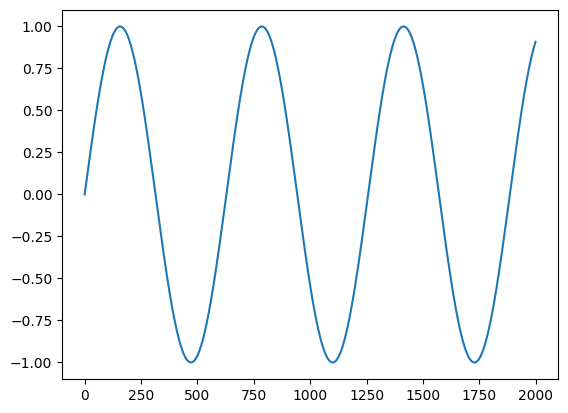

In [3]:
plt.plot(X)

In [4]:
X[:10]

array([0.        , 0.00999983, 0.01999867, 0.0299955 , 0.03998933,
       0.04997917, 0.05996401, 0.06994285, 0.07991469, 0.08987855])

In [ ]:
# [
#     [0.        , 0.00999983, 0.01999867] -> [0.0299955],
#     [0.00999983, 0.01999867, 0.0299955] -> [0.03998933],
#     [0.01999867, 0.0299955 , 0.03998933] -> [0.04997917]
#     ...
# ]

In [5]:
X_train, X_test = X[:1500], X[1500:]

In [6]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

In [7]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [8]:
XT, yT = [], []
for i in range(len(X_train) - 15):
    d = i + 15
    XT.append(X_train[i:d,])
    yT.append(X_train[d])

In [9]:
Xt, yt = [], []
for i in range(len(X_test) - 15):
    d = i + 15
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])

In [10]:
XT = np.array(XT)
Xt = np.array(Xt)

In [11]:
XT.shape

(1485, 15)

In [12]:
XT[2]

array([0.01999867, 0.0299955 , 0.03998933, 0.04997917, 0.05996401,
       0.06994285, 0.07991469, 0.08987855, 0.09983342, 0.1097783 ,
       0.11971221, 0.12963414, 0.13954311, 0.14943813, 0.15931821])

In [13]:
yT[2]

np.float64(0.16918234906699603)

In [14]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [15]:
XT.shape

(1485, 15, 1)

In [16]:
XT[0]

array([[0.        ],
       [0.00999983],
       [0.01999867],
       [0.0299955 ],
       [0.03998933],
       [0.04997917],
       [0.05996401],
       [0.06994285],
       [0.07991469],
       [0.08987855],
       [0.09983342],
       [0.1097783 ],
       [0.11971221],
       [0.12963414],
       [0.13954311]])

In [17]:
yT = np.array(yT)
yt = np.array(yt)

In [18]:
model.fit(XT, yT, epochs=100, batch_size=20)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0813  
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068
Epoch 15/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056
Ep

In [19]:
model.evaluate(Xt, yt)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010  


0.001009156578220427

In [20]:
XTPredicted = model.predict(XT)
XtPredicted = model.predict(Xt)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


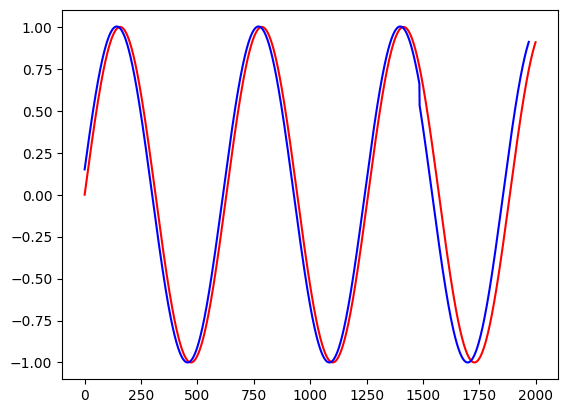

In [21]:
plt.plot(X, color='red')
plt.plot(XFinal, color='blue')